## CDades Sprint 5 Tasca 1

### Exercici 1: Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#### Descargamos el dataset y estudiamos sus características: 

In [2]:
df_uefa = pd.read_csv('C:\IT Academy\Sprint 5 Introducción al Test de Hipótesis y al Machine Learning\Lligues europees UEFA.csv', sep=';', encoding='latin-1')

In [3]:
df_uefa.head()

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas


In [4]:
df_uefa.shape

(98, 21)

In [5]:
df_uefa.dtypes

Rk                   int64
Squad               object
Country             object
LgRk                 int64
MP                   int64
W                    int64
D                    int64
L                    int64
GF                   int64
GA                   int64
GD                   int64
Pts                  int64
Pts/G              float64
xG                 float64
xGA                float64
xGD                float64
xGD/90             float64
Last 5              object
Attendance           int64
Top Team Scorer     object
Goalkeeper          object
dtype: object

In [6]:
df_uefa.columns

Index(['Rk', 'Squad', 'Country', 'LgRk', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD',
       'Pts', 'Pts/G', 'xG', 'xGA', 'xGD', 'xGD/90', 'Last 5', 'Attendance',
       'Top Team Scorer', 'Goalkeeper'],
      dtype='object')

Rk = 'Clasificación', Squad = 'Equipo', Country = 'País', LgRK = 'Ronda final alcanzada', GF = 'Goles a favor', MP = 'Matches played this season', W = 'Win', D = 'Draw', L = 'Loss', GF = 'Goals For', GA = 'Goals Against', GD = 'Goal Difference', Pts = 'Puntos', Pts/G = 'Puntos por partido', xG = 'Goles esperados', xGA = 'Goles esperados permitidos', xGD = 'Diferencia de goles esperados', xGD/90 = 'Diferencia de goles esperados en 90 minutos', 'Last 5' = 'Últimos cinco', 'Attendance' = 'Asistencia', 'Top Team Scorer' = 'Máximo goleador', 'Goalkeeper' = 'Portero'

In [7]:
df_uefa.isnull().sum()

Rk                 0
Squad              0
Country            0
LgRk               0
MP                 0
W                  0
D                  0
L                  0
GF                 0
GA                 0
GD                 0
Pts                0
Pts/G              0
xG                 0
xGA                0
xGD                0
xGD/90             0
Last 5             0
Attendance         0
Top Team Scorer    0
Goalkeeper         0
dtype: int64

In [8]:
df_uefa.isna().sum()

Rk                 0
Squad              0
Country            0
LgRk               0
MP                 0
W                  0
D                  0
L                  0
GF                 0
GA                 0
GD                 0
Pts                0
Pts/G              0
xG                 0
xGA                0
xGD                0
xGD/90             0
Last 5             0
Attendance         0
Top Team Scorer    0
Goalkeeper         0
dtype: int64

In [9]:
df_uefa.Country.unique()  # equipos que participan en la competición

array(['ENG', 'ESP', 'GER', 'FRA', 'ITA'], dtype=object)

#### Tomamos el atributo de número de goles a favor, nuestra muestra será el número de goles a favor del conjunto de equipos de Italia.  

In [10]:
data = df_uefa[df_uefa.Country=='ITA']['GF']
data

5     66
6     81
7     71
11    55
21    72
28    56
29    56
31    65
40    62
42    46
44    64
60    57
63    43
71    49
77    41
84    42
89    33
91    34
92    27
94    34
Name: GF, dtype: int64

#### Estudiamos la distribución de la muestra:

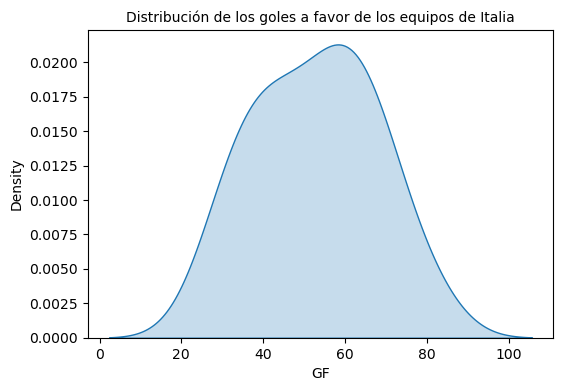

In [11]:
plt.figure(figsize= (6,4))
sns.kdeplot(df_uefa[df_uefa.Country=='ITA']['GF'], fill=True)
plt.title('Distribución de los goles a favor de los equipos de Italia', fontsize = 10);

### Planteamos la hipótesis de que la distibución de los goles de los equipos de Italia tiene una distribución normal:  
#### Hipótesis nula H0, nuestra muestra tiene una distribución normal.  
#### Hipótesis H1, nuestra muestra no tiene una distribución normal.

#### Para validar nuestra hipótesis utilizamos el Test de distribución gaussiana Shapiro-Wilk con un alpha del 5%.

In [12]:
# Hacemos una función con el test para usarlo más adelante en otros ejercicios
from scipy.stats import shapiro
def distribucion_normal(data):
    stat, p = shapiro(data)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probablemente Gaussiana')
    else:
        print('Probablemente no Gaussiana')

In [13]:
distribucion_normal(df_uefa[df_uefa.Country=='ITA']['GF'])

stat=0.972, p=0.787
Probablemente Gaussiana


#### Nuestro p-value está por encima del 5%, no rechazamos la hipótesis nula y podemos decir que tenemos un grado de confianza del 95% de que nuestra muestra tiene una distribución normal.

### En una segunda hipótesis con este atributo planteamos que la media de goles a favor de Italia es la media del resto de equipos.  
#### Hipótesis nula H0, la media de goles a favor de Italia es la media del resto de equipos.  
#### Hipótesis H1, la media de goles a favor de Italia no es la media del resto de equipos. 

#### Para validar esta hipótesis usamos el Test ttest_1samp con un alpha del 5%.

In [14]:
# Calculamos la media de goles a favor del resto de equipos
df_uefa[df_uefa['Country']!='ITA']['GF'].mean().round(2)

50.41

In [15]:
stats.ttest_1samp(a=(df_uefa[df_uefa['Country'] == 'ITA']['GF']), popmean=(df_uefa['GF'].mean().round(2)))

Ttest_1sampResult(statistic=0.5443280428376636, pvalue=0.5925472238496162)

#### Nuestro p-value está por encima del 5%, no rechazamos la hipótesis nula y podemos decir que tenemos un grado de confianza del 95% de que la media de los goles de los equipos de Italia es la media del resto de equipos.

### Exercici 2: Amb el mateix dataset selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

#### Tomamos el atributo de la asistencia, nuestras muestras serán la asistencia del conjunto de equipos de Inglaterra y de Alemania.

#### Asistencia de los equipos de Inglaterra.

In [16]:
dataAsENG = df_uefa[df_uefa['Country'] =='ENG']['Attendance']
dataAsENG

0     52739
1     53367
10    36991
14    56234
17    59636
33    73150
36    58370
41    30777
46    32521
48    30931
51    24541
55    16916
58    41748
61    51443
67    30053
74    38446
82    36308
83    19163
95    20614
96    26826
Name: Attendance, dtype: int64

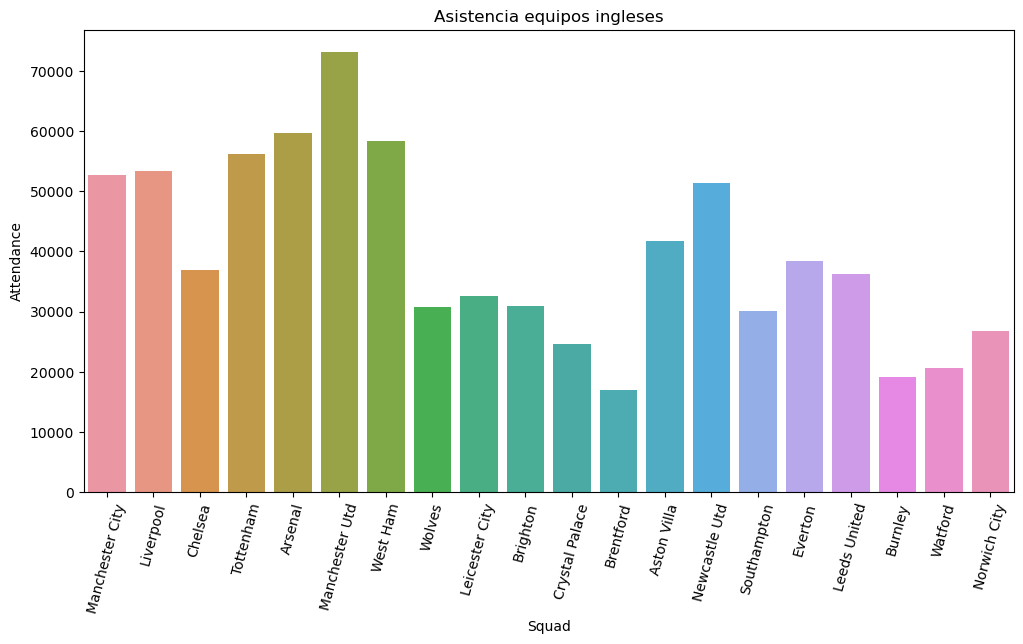

In [17]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Asistencia equipos ingleses')
sns.barplot(x=df_uefa['Squad'][dataAsENG.index], y=dataAsENG);

#### Asistencia de los equipos de Alemania.

In [18]:
dataAsGER = df_uefa[df_uefa['Country'] =='GER']['Attendance']
dataAsGER

3     33176
8     41800
12    17356
22    22124
25    14046
30    18741
34    31965
43    17978
45    11227
47    26539
54    26162
56    12018
57    15125
65    15197
76    27052
80    23500
90    16773
97     7672
Name: Attendance, dtype: int64

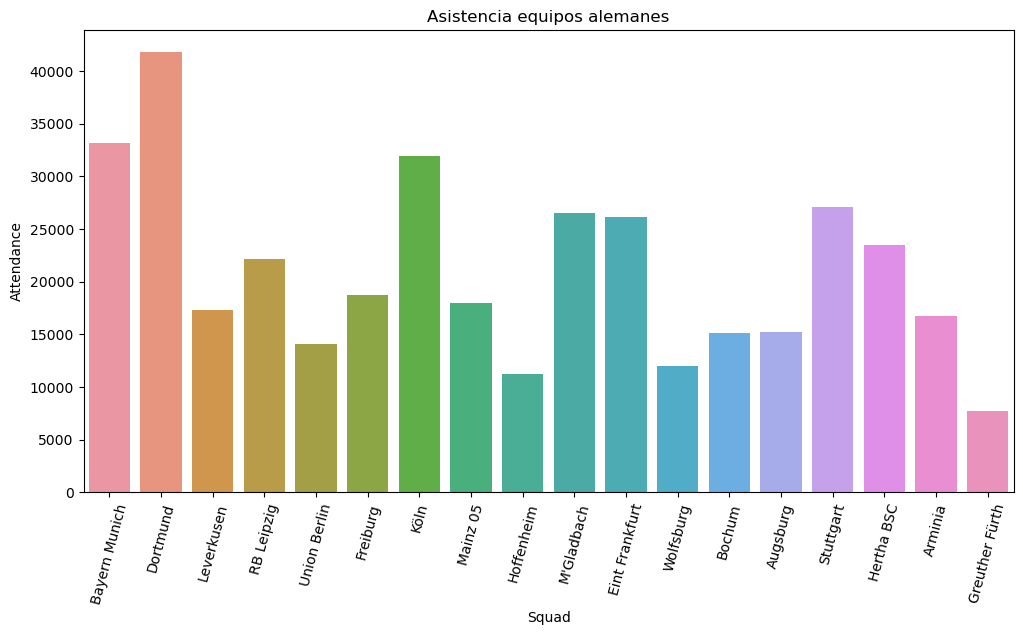

In [19]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Asistencia equipos alemanes')
sns.barplot(x=df_uefa['Squad'][dataAsGER.index], y=dataAsGER);

#### Planteamos la hipótesis de que la varianza de la asistencia a los partidos de los equipos Ingleses es igual a la varianza de la asistencia a los partidos de los equipos alemanes:
#### Hipótesis nula 𝐻0: la varianza de las muestras es igual
#### Hipótesis 𝐻1: la varianza de las muestras es diferente

#### Para validar nuestra hipótesis utilizamos el Test de Leneve y un alpha del 5%.  
#### Para aplicar este test necesitamos que nuestras muestras estén normalmente distribuidas.

Asistencia a los partidos de los equipos ingleses.

In [21]:
# comprobamos si la muestra está normalmente distribuida
dataENGAtt = df_uefa[df_uefa.Country=='ENG']['Attendance']
distribucion_normal(dataENGAtt)

stat=0.950, p=0.368
Probablemente Gaussiana


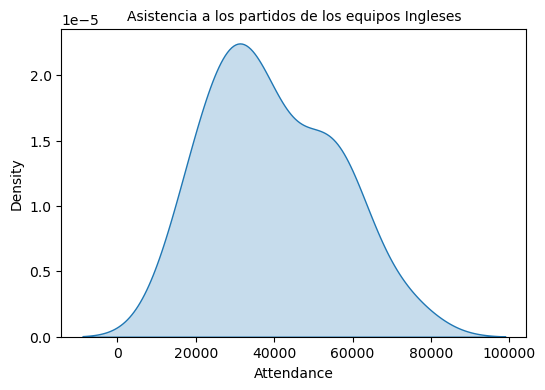

In [22]:
plt.figure(figsize= (6,4))
sns.kdeplot(dataENGAtt, fill=True)
plt.title('Asistencia a los partidos de los equipos Ingleses', fontsize = 10);

Asistencia a los partidos de los equipos alemanes.

In [23]:
# comprobamos si la muestra está normalmente distribuida  
dataGERAtt = df_uefa[df_uefa.Country=='GER']['Attendance']
distribucion_normal(dataGERAtt)

stat=0.955, p=0.503
Probablemente Gaussiana


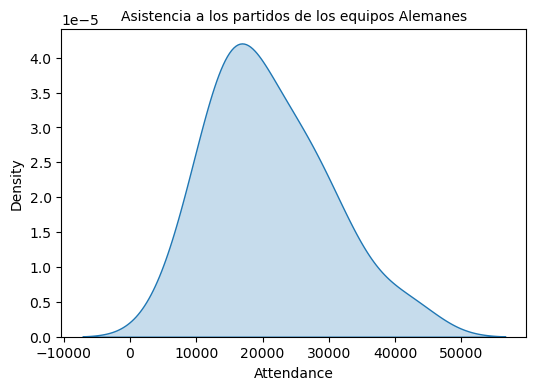

In [24]:
plt.figure(figsize= (6,4))
sns.kdeplot(dataGERAtt, fill=True)
plt.title('Asistencia a los partidos de los equipos Alemanes', fontsize = 10);

#### Aplicamos el Test de Leneve con un alpha del 5%.

In [25]:
test_stat_var, p_value_var= stats.levene(dataENGAtt,dataGERAtt)
print("p value:%.4f" % p_value_var)
if p_value_var <0.05:
    print("Las varianzas de las muestras son diferentes.")
else:
    print("Las varianzas de las muestras son iguales.")

p value:0.0286
Las varianzas de las muestras son diferentes.


#### Nuestro p-value está por debajo del 5%, rechazamos la hipótesis nula y nos quedamos con la hipótesis alternativa: las varianzas de nuestras muestras son diferentes.

### Exercici 3: Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

### Analizamos si la asistencia de público influye en el total de goles marcados por los equipos.

In [26]:
# ordenamos el dataset por asistencia
by_attendance = df_uefa.sort_values('Attendance', ascending=False)
by_attendance

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
33,34,Manchester Utd,ENG,6,37,16,10,11,57,56,...,58,1.57,53.9,54.3,-0.4,-0.01,L L D W L,73150,Cristiano Ronaldo - 18,David de Gea
17,18,Arsenal,ENG,5,36,21,3,12,56,45,...,66,1.83,56.3,44.0,12.2,0.34,W W W W L,59636,Bukayo Saka - 11,Aaron Ramsdale
36,37,West Ham,ENG,7,37,16,8,13,59,48,...,56,1.51,49.8,49.4,0.4,0.01,D L L W D,58370,Jarrod Bowen - 12,?ukasz Fabia?ski
14,15,Tottenham,ENG,4,37,21,5,11,64,40,...,68,1.84,61.5,39.0,22.5,0.61,D W D W W,56234,Son Heung-min - 21,Hugo Lloris
9,10,Barcelona,ESP,2,37,21,10,6,68,36,...,73,1.97,61.3,35.2,26.1,0.71,L W W W D,53933,Memphis Depay - 12,Marc-André ter Stegen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,71,Angers,FRA,14,37,9,11,17,42,55,...,38,1.03,42.6,47.7,-5.0,-0.14,L D L W L,7370,Sofiane Boufal - 8,Danijel Petkovi?
94,95,Venezia,ITA,20,37,6,8,23,34,69,...,26,0.70,35.4,70.5,-35.1,-0.95,L L L W D,6705,Thomas Henry - 9,Sergio Romero
77,78,Spezia,ITA,15,37,10,6,21,41,68,...,36,0.97,37.3,66.6,-29.3,-0.79,L L L L W,6380,Daniele Verde - 8,Ivan Provedel
71,72,Empoli,ITA,14,37,9,11,17,49,70,...,38,1.03,46.2,64.1,-17.9,-0.48,L W L L D,6320,Andrea Pinamonti - 13,Guglielmo Vicario


In [27]:
# rango de la asistencia
print('Asistencia mínima: ', by_attendance['Attendance'].min(), ' aficcionados. Asistencia máxima: ', by_attendance['Attendance'].max(), ' aficcionados.')

Asistencia mínima:  5870  aficcionados. Asistencia máxima:  73150  aficcionados.


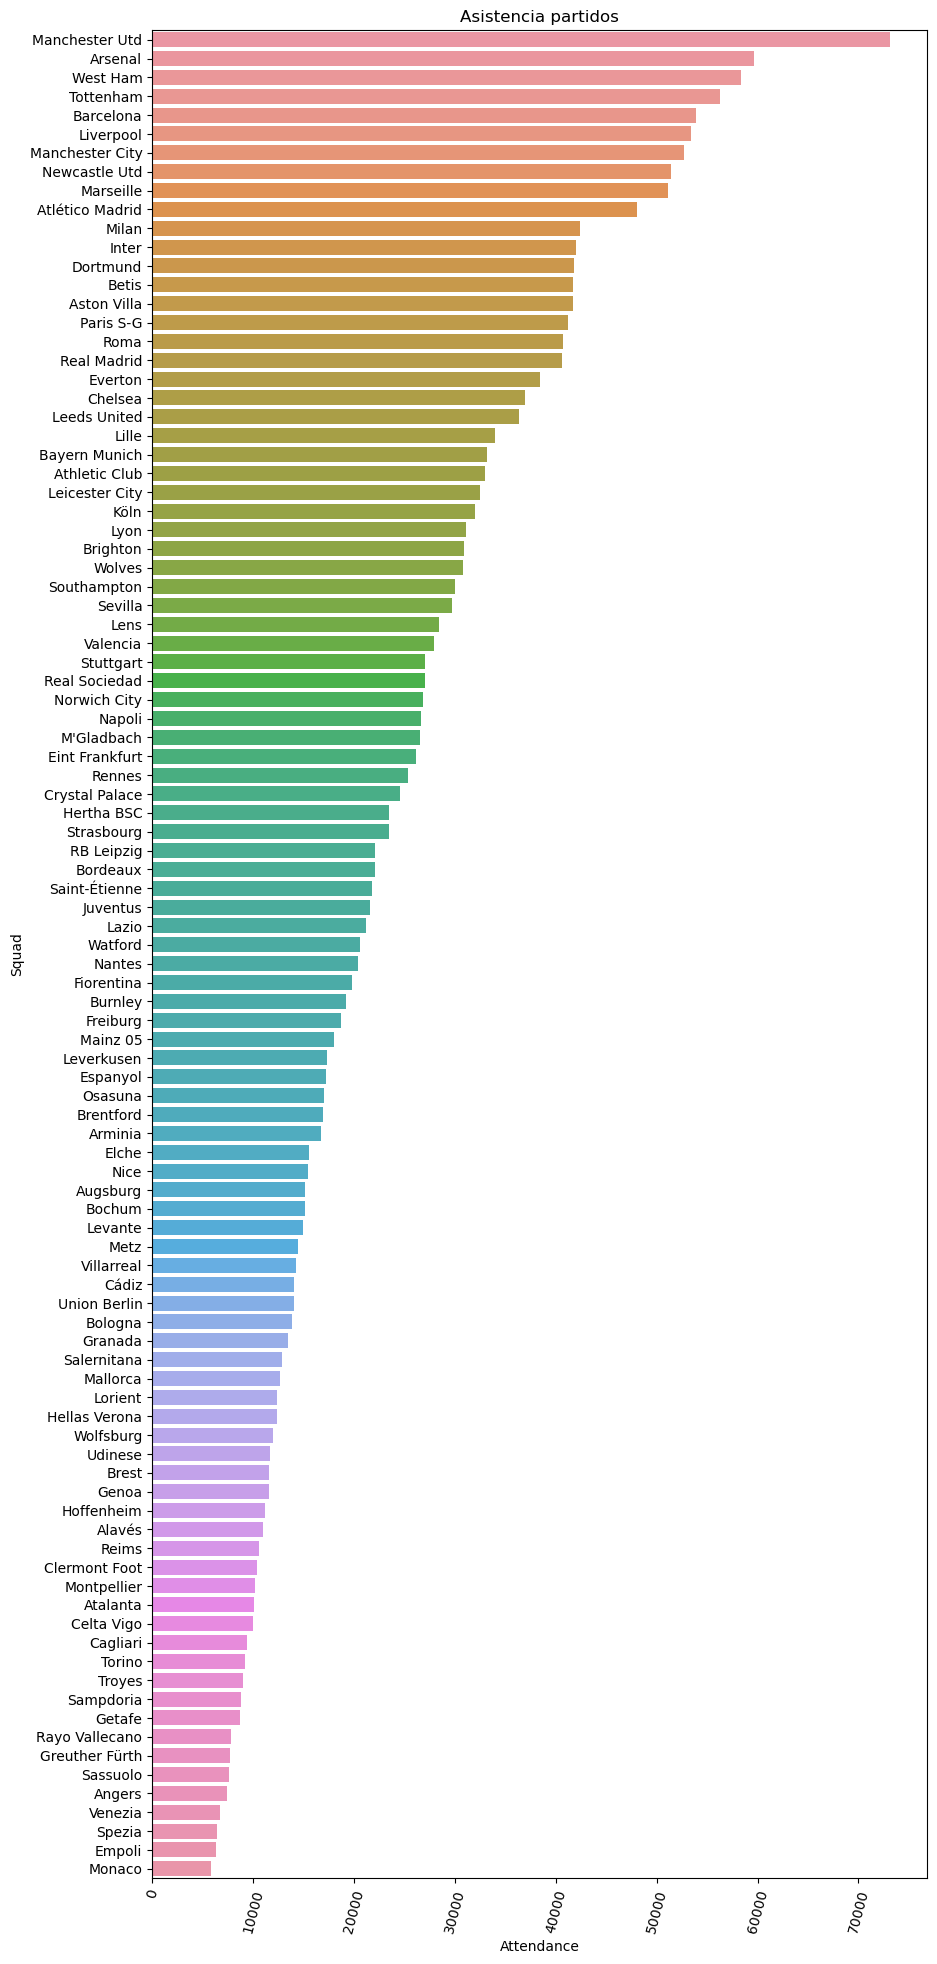

In [28]:
# distribución de la asistencia por equipo
plt.figure(figsize=(10,24))
plt.xticks(rotation=75)
plt.title('Asistencia partidos')
sns.barplot(x=by_attendance['Attendance'], y=by_attendance['Squad']);

Dividimos el dataset en tres grupos de asistencia y vemos si están equilibrados:  

In [29]:
asistencia_baja = by_attendance.loc[by_attendance['Attendance']<=15000]
asistencia_media = by_attendance.loc[(by_attendance['Attendance']>15000) & (by_attendance['Attendance']<=30000)]
asistencia_alta = by_attendance.loc[by_attendance['Attendance']>30000]

In [30]:
asistencia_baja.shape

(35, 21)

In [31]:
asistencia_media.shape

(33, 21)

In [32]:
asistencia_alta.shape

(30, 21)

De cada grupo de asistencia elegimos una muestra. Nuestra muestra será el país que más equipos ha tenido jugando en ese grupo.

El siguiente paso es elegir el equipo de cada muestra y comprobar si las muestras están normalizadas:

Muestra del grupo Asistencia baja.

In [33]:
asistencia_baja.groupby(['Country'])['Squad'].count()

Country
ESP     9
FRA     9
GER     4
ITA    13
Name: Squad, dtype: int64

Tomamos los goles de los equipos italianos:

In [34]:
distribucion_normal(asistencia_baja[asistencia_baja.Country=='ITA']['GF'])

stat=0.929, p=0.332
Probablemente Gaussiana


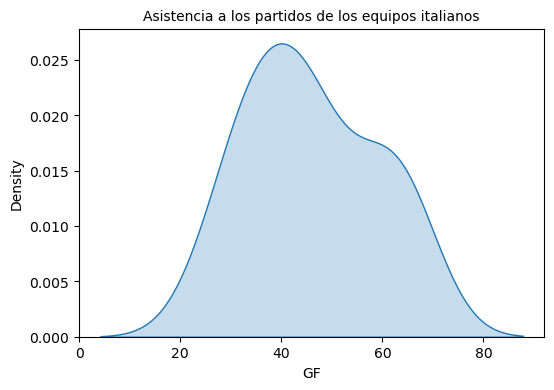

In [35]:
plt.figure(figsize= (6,4))
sns.kdeplot(asistencia_baja[asistencia_baja.Country=='ITA']['GF'], fill=True)
plt.title('Asistencia a los partidos de los equipos italianos', fontsize = 10);

Muestra del grupo Asistencia media.

In [36]:
asistencia_media.groupby(['Country'])['Squad'].count()

Country
ENG     5
ESP     6
FRA     7
GER    11
ITA     4
Name: Squad, dtype: int64

Tomamos los goles de los equipos alemanes:

In [37]:
distribucion_normal(asistencia_media[asistencia_media.Country=='GER']['GF'])

stat=0.934, p=0.458
Probablemente Gaussiana


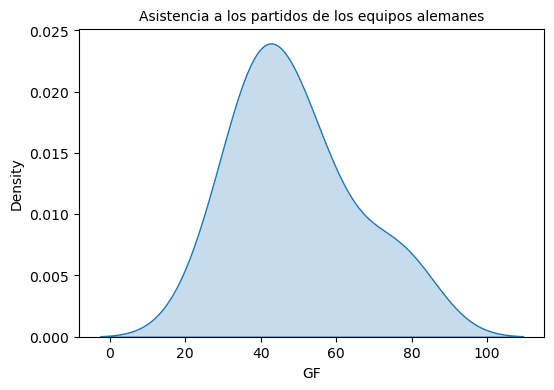

In [38]:
plt.figure(figsize= (6,4))
sns.kdeplot(asistencia_media[asistencia_media.Country=='GER']['GF'], fill=True)
plt.title('Asistencia a los partidos de los equipos alemanes', fontsize = 10);

Muestra del grupo Asistencia alta.

In [39]:
asistencia_alta.groupby(['Country'])['Squad'].count()

Country
ENG    15
ESP     5
FRA     4
GER     3
ITA     3
Name: Squad, dtype: int64

Tomamos los goles de los equipos ingleses:

In [40]:
distribucion_normal(asistencia_alta[asistencia_alta.Country=='ENG']['GF'])

stat=0.864, p=0.027
Probablemente no Gaussiana


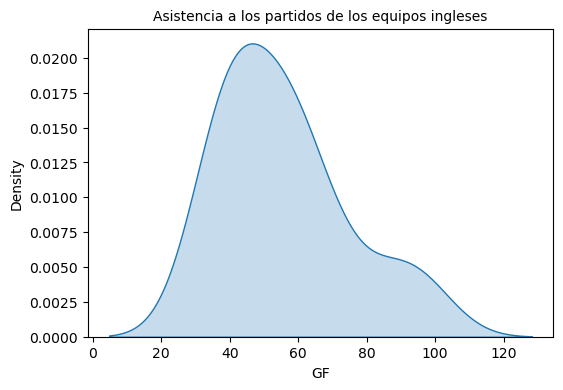

In [41]:
plt.figure(figsize= (6,4))
sns.kdeplot(asistencia_alta[asistencia_alta.Country=='ENG']['GF'], fill=True)
plt.title('Asistencia a los partidos de los equipos ingleses', fontsize = 10);

Una vez comprobadas las muestras las separamos en variables:

In [42]:
As_alta_ENG_GF = asistencia_alta[asistencia_alta.Country=='ENG']['GF']
As_media_GER_GF = asistencia_media[asistencia_media.Country=='GER']['GF']  
As_baja_ITA_GF = asistencia_baja[asistencia_baja.Country=='ITA']['GF']

### Planteamos la hipótesis de que la distribución del total de goles de los equipos seleccionados de un país dentro de los grupos de asistencia alta, asistencia media y asistencia baja es la misma
#### Hipótesis nula 𝐻0: la distribución de las muestras es igual.  
#### Hipótesis 𝐻1: la distribución de las muestras es diferente.
#### Al no estar normalizada la muestra tomada del grupo Asistencia Alta no podemos usar el Test ANOVA, usaremos el Test Kruskal-Wallis.

Las muestras necesitan tener la misma varianza para aplicar este test, lo comprobamos con el Test Levene

In [43]:
test_stat_var, p_value_var= stats.levene(As_alta_ENG_GF,As_media_GER_GF,As_baja_ITA_GF)
print("p value:%.3f" % p_value_var)
if p_value_var <0.05:
    print("Las varianzas de las muestras son diferentes")
else:
    print("Las varianzas de las muestras son iguales")

p value:0.607
Las varianzas de las muestras son iguales


#### Test Kruskal-Wallis

In [44]:
from scipy.stats import kruskal
stat, p = kruskal(As_alta_ENG_GF,As_media_GER_GF,As_baja_ITA_GF)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Las muestras probablemente presentan la misma distribución')
else:
    print('Las muestras probablemente no presentan la misma distribución')

stat=1.580, p=0.454
Las muestras probablemente presentan la misma distribución


#### Nuestro p-value está por debajo del 5%, aceptamos la hipótesis nula, podemos decir con un 95% de seguridad que las distribuciones de nuestras muestras son iguales.

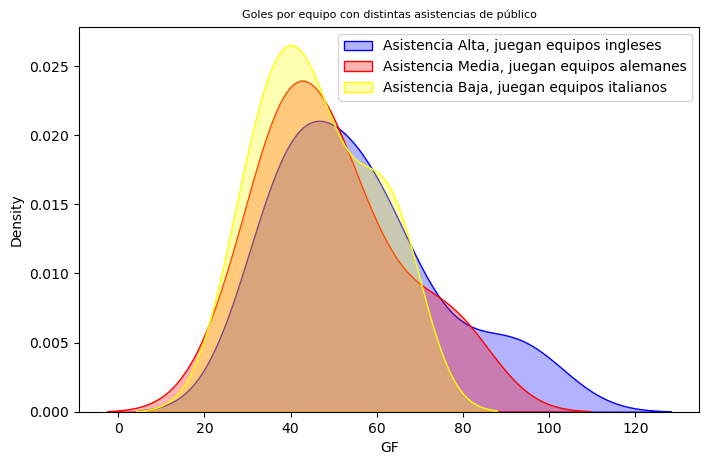

In [45]:
# Gráfica de las distribuciones
plt.figure(figsize= (8,5))

sns.kdeplot(As_alta_ENG_GF,  label= 'Asistencia Alta, juegan equipos ingleses', color= 'blue',
            fill = True, alpha= 0.30)
sns.kdeplot(As_media_GER_GF, label= 'Asistencia Media, juegan equipos alemanes', 
                                     color= 'red', fill = True, alpha = 0.30)
sns.kdeplot(As_baja_ITA_GF, label= 'Asistencia Baja, juegan equipos italianos', 
            fill = True, alpha= 0.30, color='yellow')
plt.title('Goles por equipo con distintas asistencias de público', fontsize = 8)
plt.legend();

#### Hacemos el mismo análisis pero sin filtrar los equipos por países.

### Planteamos la hipótesis de que la distribución del total de goles de todos equipos seleccionados dentro de los grupos de asistencia alta, asistencia media y asistencia baja es la misma:  
#### Hipótesis nula 𝐻0: la distribución de las muestras es igual.
#### Hipótesis 𝐻1: la distribución de las muestras es diferente.

Definimos nuestras muestras, con el mismo número de elementos:

In [46]:
As_alta_GF = asistencia_alta['GF'].iloc[0:30]
As_media_GF = asistencia_media['GF'].iloc[0:30]
As_baja_GF = asistencia_baja['GF'].iloc[0:30]

#### Test Kruskal-Wallis

In [47]:
from scipy.stats import kruskal
stat, p = kruskal(As_alta_GF,As_media_GF,As_baja_GF)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Las muestras probablemente presentan la misma distribución')
else:
    print('Las muestras probablemente no presentan la misma distribución')

stat=17.396, p=0.000
Las muestras probablemente no presentan la misma distribución


#### Nuestro p-value está por debajo del 5%, rechazamos la hipótesis nula y aceptamos la hipótesis alternativa, las distribuciones de nuestras muestras son diferentes.

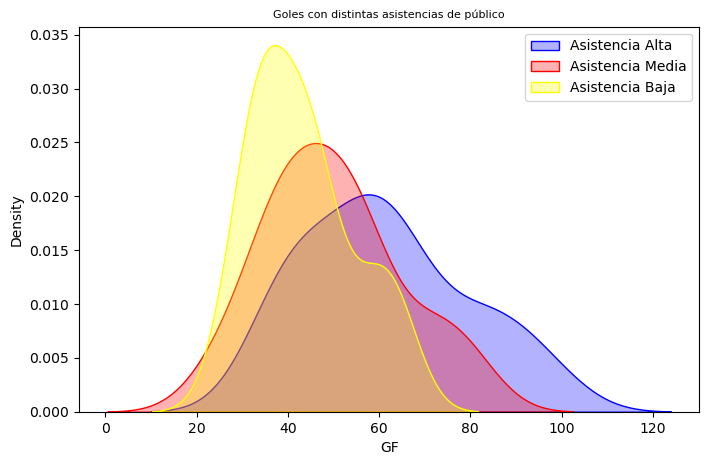

In [48]:
plt.figure(figsize= (8,5))

sns.kdeplot(asistencia_alta['GF'].iloc[0:30],  label= 'Asistencia Alta', color= 'blue',
            fill = True, alpha= 0.30)
sns.kdeplot(asistencia_media['GF'].iloc[0:30], label= 'Asistencia Media', 
                                     color= 'red', fill = True, alpha = 0.30)
sns.kdeplot(asistencia_baja['GF'].iloc[0:30], label= 'Asistencia Baja', 
            fill = True, alpha= 0.30, color='yellow')
plt.title('Goles con distintas asistencias de público', fontsize = 8)
plt.legend();

#### Observamos que la asistencia sí está relacionada con el total de goles marcados, a menor asistencia también menor número de goles marcados en total por equipo. Podemos pensar que los mejores equipos arrastran más público y también tienen capacidad de hacer más tantos.  
#### Por otro otro lado, cuando nos centramos dentro de cada grupo de asistencia en los equipos de un sólo país vemos que el número de goles marcados es muy similar entre países. Pensamos que esto es debido a que las muestras no tienen los mismos elementos, repetimos el test tomando los mismos elementos.

Redefinimos las muestras para que haya el mismo número de equipos por país en cada grupo de asistencia.

In [49]:
As_alta_ENG_GF = asistencia_alta[asistencia_alta.Country=='ENG']['GF'].iloc[0:11]
As_media_GER_GF = asistencia_media[asistencia_media.Country=='GER']['GF'].iloc[0:11] 
As_baja_ITA_GF = asistencia_baja[asistencia_baja.Country=='ITA']['GF'].iloc[0:11]

#### Test Kruskal-Wallis

In [50]:
from scipy.stats import kruskal
stat, p = kruskal(As_alta_GF,As_media_GF,As_baja_GF)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Las muestras probablemente presentan la misma distribución')
else:
    print('Las muestras probablemente no presentan la misma distribución')

stat=17.396, p=0.000
Las muestras probablemente no presentan la misma distribución


#### Nuestro p-value está por debajo del 5%, rechazamos la hipótesis nula y aceptamos la hipótesis alternativa, las distribuciones de nuestras muestras son diferentes.

Confirmamos el resultado del test con una gráfica.

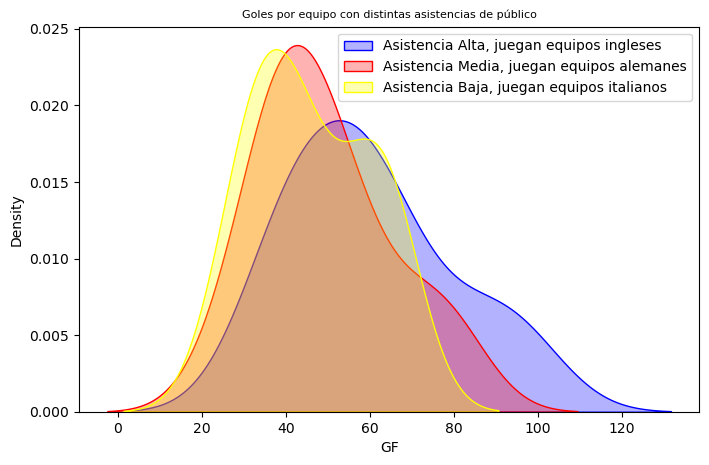

In [51]:
# Gráfica de las distribuciones
plt.figure(figsize= (8,5))

sns.kdeplot(As_alta_ENG_GF,  label= 'Asistencia Alta, juegan equipos ingleses', color= 'blue',
            fill = True, alpha= 0.30)
sns.kdeplot(As_media_GER_GF, label= 'Asistencia Media, juegan equipos alemanes', 
                                     color= 'red', fill = True, alpha = 0.30)
sns.kdeplot(As_baja_ITA_GF, label= 'Asistencia Baja, juegan equipos italianos', 
            fill = True, alpha= 0.30, color='yellow')
plt.title('Goles por equipo con distintas asistencias de público', fontsize = 8)
plt.legend();